In [2]:
pip install bioinfokit

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58685 sha256=e92de0694648556e9b484e9cdf581e4b4713b52a134255060cd454e74fcac7d7
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c9\ab\ed\8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33038 sha256=9273559a5216d562c5a2678d283fc1343b5b537ee613916a7846971ef7d3e4c3
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\25\de\d4\29dfc5d4520b956df7bc54a8464ad053042918bc525e88bf66
Successfully built bioinfokit matplotlib-venn


In [60]:
import bioinfokit

In [61]:

import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

In [62]:
data=pd.read_csv("C:/Users/admin/Downloads/mcdonalds.csv")
data1=pd.read_csv("C:/Users/admin/Downloads/mcdonalds.csv")
data.columns.values.tolist() # this command is used for to indicate the list of variables .

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [63]:
data.shape # this command is used for how many rows and column in Our datasets

(1453, 15)

In [64]:
data.head(5) # To show that first 5 rows that's why we used this data.head command 

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [65]:
#the first 11 columns of the data DataFrame using iloc and creates a new DataFrame named MD. It replaces 
 #the string values "Yes" with the integer value 1 and "No" with the integer value 0.
    

MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [66]:
#PCA() class is initialized, and then fit_transform() is 
# used to fit the PCA model to the MD DataFrame and transform the data into the principal components.
#np.sqrt(pca.explained_variance_), and the proportion of variance 
# explained by each component is obtained using pca.explained_variance_ratio_

#Finally, a DataFrame named summary is created using pd.DataFrame() with the standard deviation, 
# proportion of variance, and cumulative proportion as columns, and the index labels from index


pca = PCA() 
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [67]:
print("Standard Deviation:\n",SD.round(1))  # SD Means it represent the standard deviation of the each principle component .and 
# round one means values to one decimal place 


load = (pca.components_) # Loading the variable 
i=0
rot_matrix = MD_p.components_.T #Here, the variable rot_matrix is created to store the rotated principal component loadings. 
# MD_p is the PCA instance fitted on the original data, without transformation.


#The DataFrame is constructed using the pd.DataFrame() function, where rot_matrix represents the data, 
# MD.columns.values represents the index (original variable names), and index represents the column names (created earlier).
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
# function rounds the values in the rot_df DataFrame to three decimal places. 
#  Additionally, a negative sign is applied to reverse the direction of the loadings for better interpretation
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


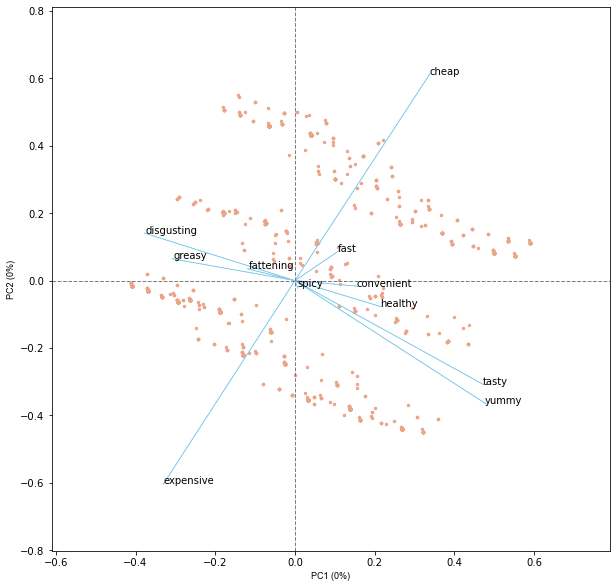

In [68]:
# I will assume a standard biplot function is being used that takes the following parameters:
#cscore: The principal component scores or transformed data. In this case, it is represented 
# by MD_pca, which likely contains the transformed data obtained after performing PCA
#loadings: The principal component loadings. In the code, it is 
#represented by -load, where load likely contains the loadings obtained from the PCA
#var1 and var2: The indices or labels of the two principal components to be plotted. 
# In this case, both are set to 0, indicating the first principal component.
#show: A boolean value indicating whether to display the biplot. It is set to True in the code
# dimension of the size 

cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))


In [69]:
from sklearn.cluster import KMeans
km=KMeans(1)

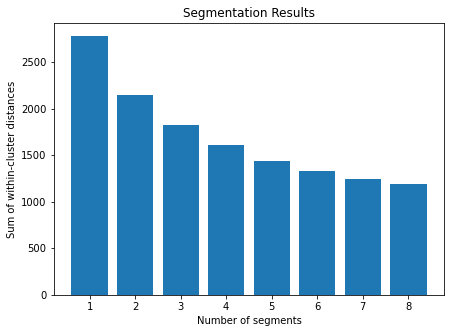

In [70]:
np.random.seed(1234) #The np.random.seed(1234) line sets the random seed for the NumPy random number generator to 1234

nrep = 10 #This variable represents the number of repetitions for the K-means algorithm.

num_segments = range(1, 9) #num_segments variable is assigned the range from 1 to 8 using range(1, 9). 
# This variable will be used to define the different numbers of clusters
within_cluster_distances = []#It will store the sum of within-cluster distances for each number of clusters.
MD_km28 = {} # It will store the KMeans objects corresponding to each number of clusters.
  
    
    
#Creates a K-means clustering object kmeans using KMeans() from scikit-learn's cluster module. 
#The number of clusters is set to k, the number of initializations is set to nrep, and the random seed is set to 1234.

#Fits the K-means model to the data MD using the fit() method.
 #Appends the sum of within-cluster distances (retrieved using inertia_) to the within_cluster_distances list.
 #Stores the KMeans object in the MD_km28 dictionary using the number of clusters (k) as the key.
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

    
    
#This code uses matplotlib's plt.bar() function to create a bar plot.
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments") # x axis of the plot represent the different number of segment 
plt.ylabel("Sum of within-cluster distances")# y axis of plot represent the sum of within-cluster distances are stored
# in the within _cluster_distances
plt.title("Segmentation Results")
plt.show()
#The plot helps visualize the relationship between the number of clusters 
#and the sum of within-cluster distances, providing insights into the optimal number of clusters for the given data set.
#The plot helps visualize the relationship between the number of clusters and the sum of within-cluster distances

In [71]:
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [72]:
MD.values

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [73]:
pip install --upgrade bioinfokit


Note: you may need to restart the kernel to use updated packages.


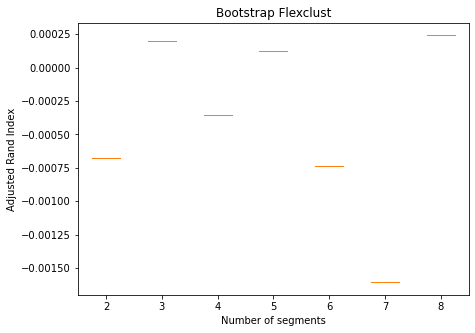

In [59]:
np.random.seed(1234) 
nboot = 100  
nrep = 10 #These lines define the variables nboot and nrep. nboot represents the number of bootstrap samples to generate, 
# and nrep represents the number of repetitions for the K-means algorithm

bootstrap_samples = []
for _ in range(nboot): #This loop generates nboot bootstrap samples using the resample() function
    bootstrap_sample = resample(MD.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

    
## bootstrap clustering and calculates the adjusted Rand index for each number of segments (k) in the range from 2 to 8 (num_segments).

#The outer loop iterates over each k in num_segments.
#The stability_scores list is initialized to store the adjusted Rand index values for each bootstrap sample.
#The inner loop iterates over each bootstrap sample.
#For each bootstrap sample, a K-means clustering model is created using the KMeans() function. 
#The number of clusters is set to k, the number of repetitions is set to nrep, and the random seed is set to 1234.
#The K-means model is fitted to the bootstrap sample using the fit() method.
#Cluster labels are obtained using the predict() method on the bootstrap sample.
#True labels are obtained by predicting cluster labels on the original data MD.values.
#The adjusted Rand index is calculated using the adjusted_rand_score() function, which compares the similarity between true 
#and predicted labels.
#The stability score is appended to the stability_scores list.
#The stability_scores list is appended to the adjusted_rand_index list.

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T#This line transposes the adjusted_rand_index list using np.array().T, 
# so that each row represents a bootstrap sample and each column represents a number of segments (k).

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()
#The plt.xlabel(), plt.ylabel(), and plt.title() functions set the labels and title for the plot.
#plt.show() displays the plot.

In [75]:
pip install --upgrade bioinfokit


Note: you may need to restart the kernel to use updated packages.


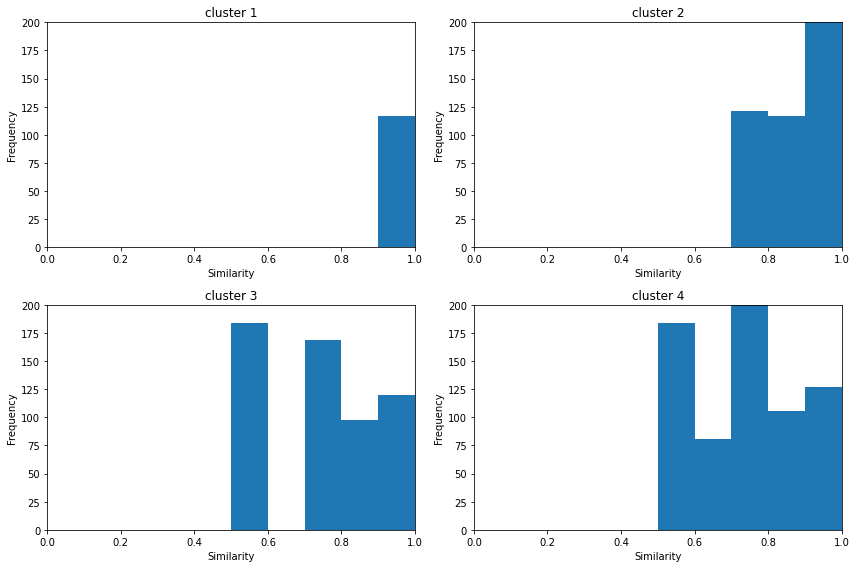

In [76]:
range_values = (0, 1)#Set the range of values for the x-axis (range_values) to be from 0 to 1.

num_bins = 10 #Define the number of bins (num_bins) for the histogram.

max_frequency = 200 #Specify the maximum frequency (max_frequency) to be displayed on the y-axis


fig, axs = plt.subplots(2, 2, figsize=(12, 8))#Create a figure and a 2x2 grid of subplots using plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):#Iterate over each cluster using the loop for i in range(1, 5) 
    #(clusters are assumed to be numbered from 1 to 4
    labels = MD_km28[str(i)].predict(MD)#Predict the labels for the given data (MD) using the 
    #clustering model MD_km28[str(i)] and assign them to labels
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2#Calculate the row and column indices in the subplot grid based on 
    # the current cluster number (i) using the formulas (i - 1) // 2 and (i - 1) % 2, respectively.

    
#Plot a histogram of the similarities data using axs[row, col].hist(similarities, bins=num_bins, range=range_values). 
# This will create a histogram plot


    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

#Set the x-axis tick positions to [0, 0.2, 0.4, 0.6, 0.8, 1.0] using axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


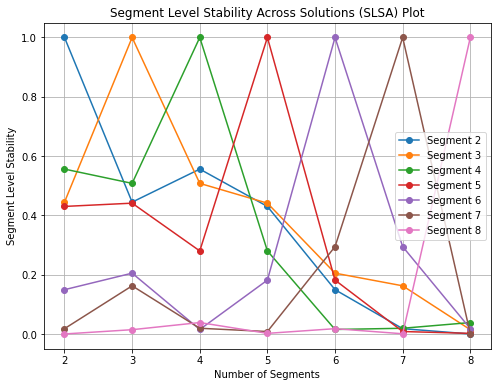

In [77]:
#Define a range of values for the number of segments (num_segments) from 2 to 8.

Create an empty list segment_stability to store the labels for each segment.

Iterate over each segment using the loop for segment in range(2, 9).

Predict the labels for the given data (MD) using the clustering model MD_km28[str(segment)] and assign them to labels_segment. This step calculates the cluster labels for each data point in the dataset using the specified number of segments.

Append the labels_segment to the segment_stability list. This step adds the predicted cluster labels for each segment to the segment_stability list.

Create a new figure with a size of 8x6 using plt.figure(figsize=(8, 6)) to initialize a figure for the plot.
num_segments = range(2, 9)

segment_stability = []#Create an empty list segment_stability to store the labels for each segment.

for segment in range(2, 9):  #Iterate over each segment using the loop for segment in range(2, 9).
# Iterate over each segment using the loop for segment in range(2, 9).

# Predict the labels for the given data (MD) using the clustering model MD_km28[str(segment)] and assign them to labels_segment. 
#This step calculates the cluster labels for each data point in the dataset using the specified number of segments.

#Append the labels_segment to the segment_stability list. This step adds the predicted cluster labels for 
#each segment to the segment_stability list.
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))#Create a new figure with a size of 8x6 using plt.figure(figsize=(8, 6)) to 
# initialize a figure for the plot
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

    
    
#Plot a line graph for each segment, showing the segment level stability, using plt.plot(num_segments, 
#[np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}').
#num_segments is used as the x-values for the plot, representing the number of segments.
#[np.mean(segment_stability[i] == labels) for labels in segment_stability] calculates the segment level stability for each label set in segment_stability. It compares each label set to the labels for the current segment (segment_stability[i]) and calculates the mean, resulting in a stability value.
#marker='o' adds circular markers to the plot points for better visibility.
#label=f'Segment {segment}' sets the label for the legend based on the segment number.


plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()
#Display a legend for the different segments using plt.legend().
#Add a grid to the plot using plt.grid(True) to improve readability.
#Finally, use plt.show() to display the plot.

#Define a list segment_solutions containing the segment numbers as strings (e.g., ["2", "3", "4", "5"]).

#Create two empty dictionaries: segment_labels to store the cluster labels for each segment and segment_similarities 
#to store the similarities between the data and the cluster centroids for each segment.
#Iterate over each segment in segment_solutions using the loop for segment in segment_solutions.
#For each segment, predict the cluster labels for the given data (MD) using the clustering model MD_km28[segment] 
#and store the labels in segment_labels[segment].
#For each segment, calculate the similarities between the data and the cluster centroids using MD_km28[segment].
#transform(MD).min(axis=1) and store the similarities in segment_similarities[segment]. 
#These similarities represent the minimum distance from each data point to the centroids of the corresponding cluster.
#Append the normalized similarities to segment_stability_values.

#Use plt.boxplot(segment_stability_values, whis=1.5) to create a box plot of the segment stability values across different solutions. The whis=1.5 argument sets the whisker length.

#Set the x-axis label to "Segment Number" using plt.xlabel("Segment Number").

#Set the y-axis label to "Segment Stability" using plt.ylabel("Segment Stability").

#Set the x-axis tick positions and labels using plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions). This ensures the x-axis tick positions align with the segment numbers.

#Set the y-axis limits to be between 0 and 1 using plt.ylim(0, 1).

# So here we can say that Each box represents the distribution of segment stability values for a specific segment across the solutions. The stability values are calculated based on the similarities between the data and the cluster centroids. The code uses matplotlib to create the plot, numpy for calculations

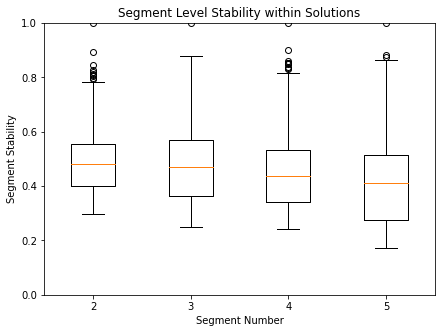

In [97]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

#Define a range of values for the number of clusters (k_values) from 2 to 8.
#Create an empty list MD_m28 to store the metrics and statistics for each value of k.
#Iterate over each value of k using the loop for k in k_values.
#Create a KMeans model with the specified number of clusters (k) and a random seed of 1234 using model = KMeans(n_clusters=k, random_state=1234).
#Fit the KMeans model to the data (MD.values) using model.fit(MD.values)
 #Set the converged variable to True since the algorithm has converged.
#Assign the values of k to both k_val and k0_val. (It seems k0_val is redundant here, as it has the same value as k.)
#Calculate the log-likelihood of the model (-model.inertia_) and assign it to log_likelihood.
#Obtain the number of samples (n_samples) and the number of features (_) in the dataset (MD.shape).
#Calculate the AIC (Akaike Information Criterion) using the formula -2 * log_likelihood + 2 * k and assign it to aic.
#Calculate the probabilities of each cluster label by dividing counts by the sum of all counts using counts / float(counts.sum()) and assign them to probs.
#Calculate the entropy of the cluster probabilities using entropy(probs) and assign it to class_entropy.

#Append a tuple containing all the calculated metrics and statistics to the MD_m28 list.
#Print the resulting DataFrame MD_m28, which displays the calculated metrics and statistics for each value of k.

In [79]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    18       True  3   3 -1819.760124  3645.520247  3661.364404  3660.283376
2    13       True  4   4 -1603.020916  3214.041831  3235.167374  3233.822143
3    10       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.896202  2675.792404  2707.480718  2705.715191
5    10       True  7   7 -1247.102133  2508.204266  2545.173966  2543.249651
6    11       True  8   8 -1186.873546  2389.747091  2431.998177  2429.996533


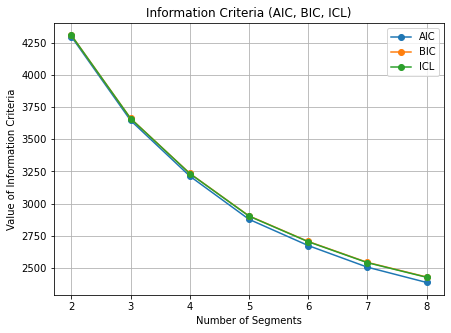

In [80]:
## With the help of AIC ,BIC ICL Values we are plotting x axis Number of Segments and Value of Information Criteria ,
# Information criteria is used as title .


num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

#Set the number of clusters (k) to 4.
#Create a K-means clustering model with the specified number of clusters (k) and a random seed of 1234 using kmeans = KMeans(n_clusters=k, random_state=1234).
#Fit the K-means model to the data (MD) using kmeans.fit(MD).
#Predict the cluster assignments for the data using kmeans.predict(MD) and assign the results to kmeans_clusters.
#Create a GMM model with the specified number of components (k) and a random seed of 1234 using gmm = GaussianMixture(n_components=k, random_state=1234).
#Fit the GMM model to the data (MD) using gmm.fit(MD).
#Predict the cluster assignments for the data using gmm.predict(MD) and assign the results to gmm_clusters.
#Create a DataFrame results that combines the cluster assignments from K-means (kmeans_clusters) and GMM (gmm_clusters).
#Create a K-means clustering model (k4_m4) with the specified number of clusters (k) and a random seed of 1234.
#Fit the K-means model to the subsetted data (MD_m4) using k4_m4.fit(MD_m4).
#Predict the cluster assignments for the subsetted data using k4_m4.predict(MD_m4) and assign the results to k4_m4_clusters.
#Create a DataFrame results_m4 that contains the cluster assignments from the K-means clustering on the subsetted data (k4_m4_clusters) and assigns all values as 3 to match the 'mixture' column.
#Print the cross-tabulation of the cluster assignments between K-means and GMM using pd.crosstab(results['kmeans'], results['mixture'])
#Print the cross-tabulation of the cluster assignments between K-means on the full data and K-means on the subsetted data using pd.crosstab(results['kmeans'], results_m4['kmeans']).

In [81]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0          0  340    0  186
1          0   49  259   65
2        199    1   35    4
3        256    2    0   57
kmeans   0   1   2   3
kmeans                
0       55  20  20  14
1       47  17  14   5
2       26  15   6   3
3       42  11  10   7


In [82]:
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0



#Set the number of clusters (k) to 4.
#Create a K-means clustering model with the specified number of clusters (k) and a random seed of 1234 using kmeans = KMeans(n_clusters=k, random_state=1234).
#Fit the K-means model to the data (MD) using kmeans.fit(MD).
#Predict the cluster assignments for the data using kmeans.predict(MD) and assign the results to kmeans_clusters.
#Create a GMM model with the specified number of components (k) and a random seed of 1234 using gmm = GaussianMixture(n_components=k, random_state=1234).
 #Fit the GMM model to the data (MD) using gmm.fit(MD).
#Predict the cluster assignments for the data using gmm.predict(MD) and assign the results to gmm_clusters
#Create a K-means clustering model (k4_m4) with the specified number of clusters (k) and a random seed of 1234.
#Fit the K-means model to the subsetted data (MD_m4) using k4_m4.fit(MD_m4).
#Predict the cluster assignments for the subsetted data using k4_m4.predict(MD_m4) and assign the results to k4_m4_clusters.
#Create a DataFrame results_m4 that contains the cluster assignments from the K-means clustering on the subsetted data (k4_m4_clusters) and assigns all values as 3 to match the 'mixture' column.

In [142]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 12.040332676630277
Log-likelihood for MD.m4: 12.323116827467683


In [84]:
#Perform value counting on the 'Like' column of the DataFrame data using 
#pd.value_counts(data['Like']) and assign the result to like_counts
#Reverse the order of the value counts by using .iloc[::-1] on like_counts.
#Print the reversed value counts using print(reversed_counts).
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: Like, dtype: int64


In [85]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [86]:
from patsy import dmatrices

independent_vars = data.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [87]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


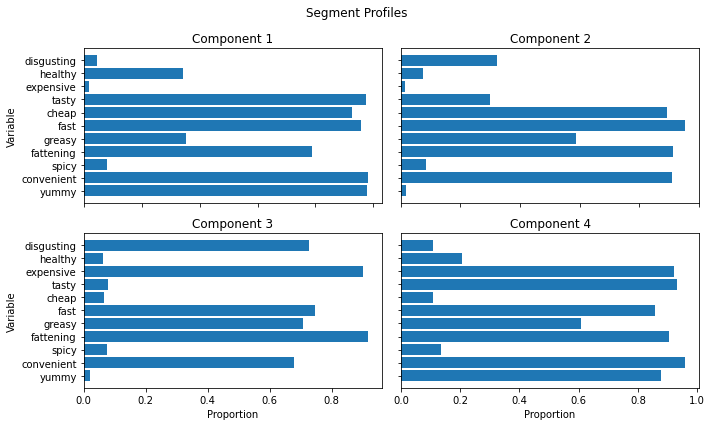

In [88]:
## Here we have to find component of 1,2,3,4 with the help of the matplotlib library using this suitable library we will get the plot

import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')


for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

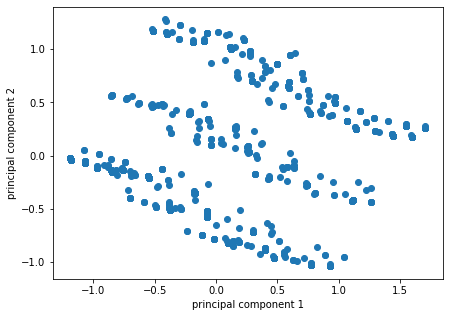

In [89]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

# here we can see first we have plot of pca 1 vs pca2 . then here we can see that here there are three cluster of the given datasets .


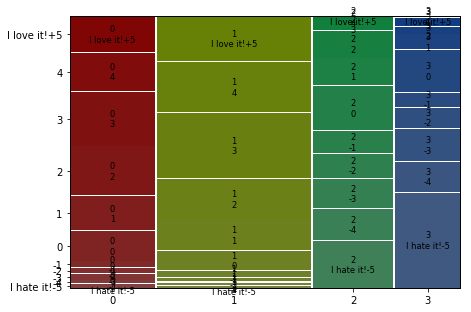

In [90]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data1
df_eleven = data1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
data1
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

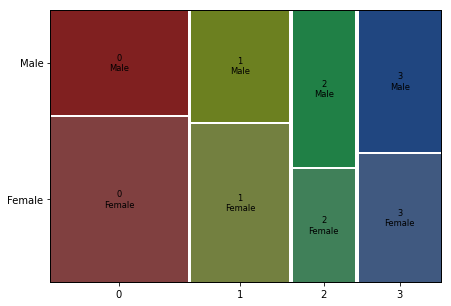

In [91]:

#Retrieve the cluster assignments for the specific cluster solution with 4 clusters (MD_km28['4']) and assign them to MD_k4.
#Extract the labels from MD_k4 using MD_k4.labels_ and assign them to k4.
#Perform cross-tabulation between k4 (cluster assignments) and data['Gender'] using pd.crosstab(k4, data['Gender']) and 
#assign the result to ct. This step creates a contingency table that counts the occurrences of each combination of cluster 
#assignments and gender.
#Display the contingency table ct.
#Create a mosaic plot using mosaic(ct.stack(), gap=0.01). 
#The mosaic() function accepts the stacked contingency table (ct.stack()) as input and sets the gap between tiles to 0.01.


MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

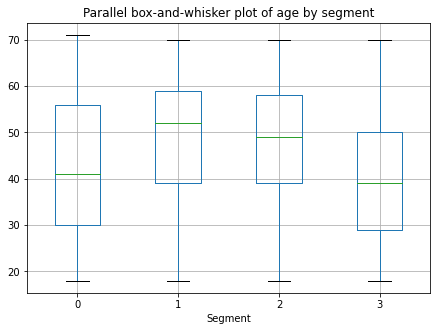

In [92]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()
## here we plot the box  whiskar . in box whisker we see the middle line of the box whisker .it indicates that 50 percentage 
# of data . if In Box whisker there upper end and lower end.if the middle line is in upper end so the given data is negatively 
# skewed .and if middleline is in lower case so the given data is positively skewed.

In [93]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [94]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.396285
1,1,6.851724
2,2,4.391447
3,3,5.211382


In [95]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


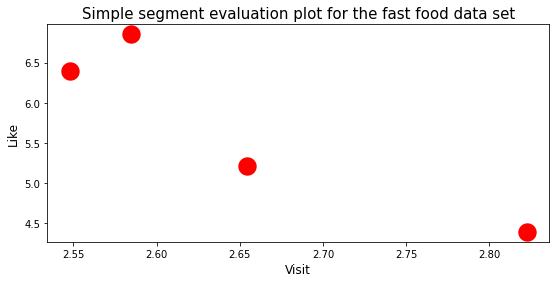

In [96]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()